Problem Statement:
A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash.
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.
The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
We have to build a classification model to predict whether a transaction is fraudulent or not.

Import Libraries

In [3]:
# Install required library
!pip install xgboost

# Data Processing and Manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    roc_auc_score,
    confusion_matrix
)
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Handling imbalanced data
from imblearn.over_sampling import SMOTE

# Model deployment
import joblib



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: pip install --upgrade pip


In [4]:
import pandas as pd

# URL of the CSV file
url = "https://kh3-ls-storage.s3.us-east-1.amazonaws.com/DS%20Project%20Guide%20Data%20Set/creditcard.csv"

# Read the CSV file from the URL
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

EDA

In [6]:
pd.options.display.max_columns = None
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

In [7]:
df.shape

(284807, 31)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

                V10           V11           V12           V13           V14  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   2.239053e-15  1.673327e-15 -1.247012e-15  8.190001e-16  1.207294e-15   
std    1.088850e+00  1.020713e+00  9.992014e-01  9.952742e-01  9.585956e-01   
min   -2.458826e+01 -4.797473e+00 -1.868371e+01 -5.791881e+00 -1.921433e+01   
25%   -5.354257e-01 -7.624942e-01 -4.055715e-01 -6.485393e-01 -4.255740e-01   
50%   -9.291738e-02 -3.275735e-02  1.400326e-01 -1.356806e-02  5.060132e-02   
75%    4.539234e-01  7.395934e-01  6.182380e-01  6.625050e-01  4.931498e-01   
max    2.374514e+01  1.201891e+01  7.848392e+00  7.126883e+00  1.052677e+01   

                V15           V16           V17           V18           V19  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   4.887456e-15  1.437716e-15 -3.772171e-16  9.564149e-16  1.039917e-15   
std    9.153160e-01  8.762529e-01  8.493371e-01  8.381762e-01  8.140405e-01   
min   -4.498945e+00 -1.412985e+01 -2.516280e+01 -9.498746e+00 -7.213527e+00   
25%   -5.828843e-01 -4.680368e-01 -4.837483e-01 -4.988498e-01 -4.562989e-01   
50%    4.807155e-02  6.641332e-02 -6.567575e-02 -3.636312e-03  3.734823e-03   
75%    6.488208e-01  5.232963e-01  3.996750e-01  5.008067e-01  4.589494e-01   
max    8.877742e+00  1.731511e+01  9.253526e+00  5.041069e+00  5.591971e+00   

                V20           V21           V22           V23           V24  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   6.406204e-16  1.654067e-16 -3.568593e-16  2.578648e-16  4.473266e-15   
std    7.709250e-01  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min   -5.449772e+01 -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%   -2.117214e-01 -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%   -6.248109e-02 -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    1.330408e-01  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    3.942090e+01  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   5.340915e-16  1.683437e-15 -3.660091e-16 -1.227390e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02

In [10]:
# number of fraud cases in the dataset
fraud = df[df['Class'] == 1]
legit = df[df['Class'] == 0]

# fraction of fraud cases
fraction = len(fraud)/len(df)

print(f'Fraud Cases: {len(fraud)}')
print(f'Legitimate Cases: {len(legit)}')
print(f'Fraction of fraud cases: {fraction}')

Fraud Cases: 492
Legitimate Cases: 284315
Fraction of fraud cases: 0.001727485630620034


In [11]:
# amount details of the fraudulent transaction
print("Amount details of the fraudulent transaction:")
print(fraud.Amount.describe())


Amount details of the fraudulent transaction:
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


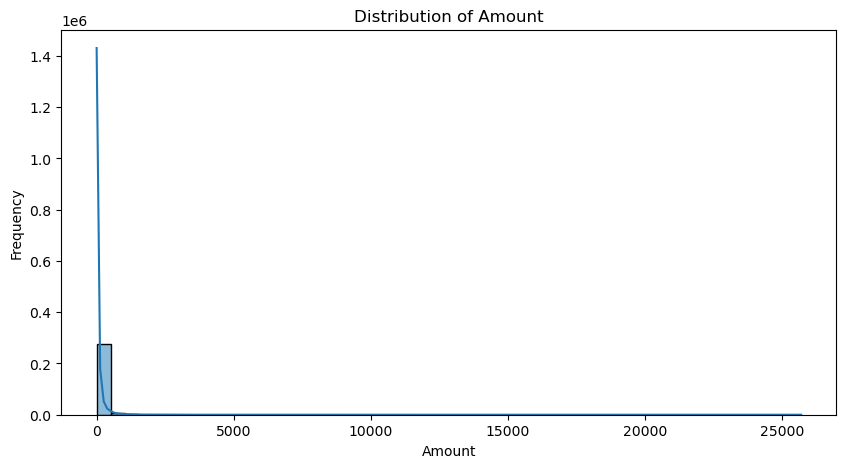

In [12]:
# visualize the distribution of amount
plt.figure(figsize=(10,5))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Amount')
plt.show()

In [13]:
# visualize the distribution of time transaction

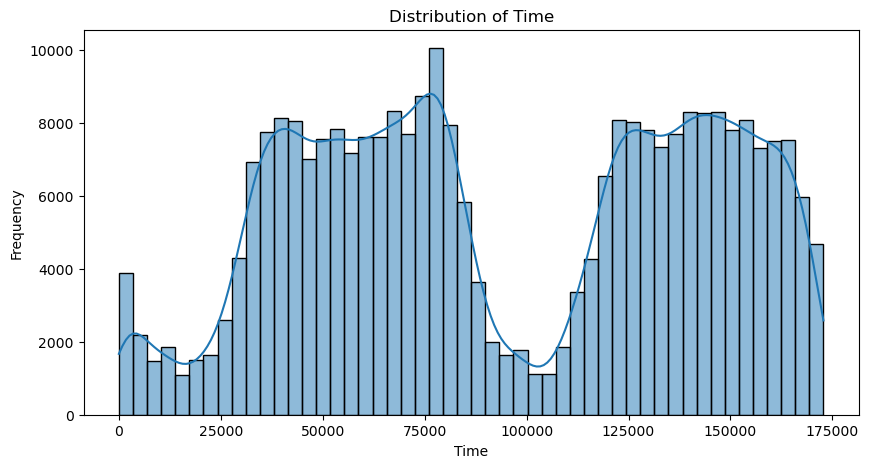

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(df['Time'], bins=50, kde=True)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Distribution of Time')
plt.show()

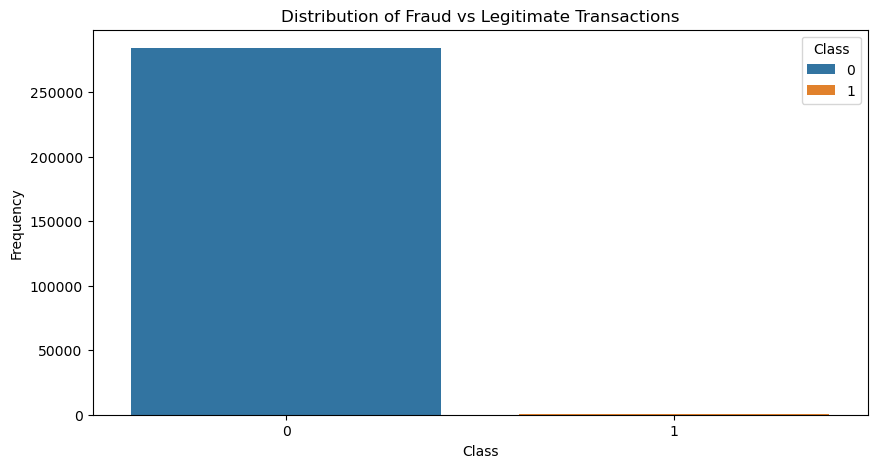

Fraud Percentage: 0.17%


In [15]:
# visualize the distribution of fraud vs legit transaction
plt.figure(figsize=(10,5))
sns.countplot(x='Class', data=df, hue='Class')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Distribution of Fraud vs Legitimate Transactions')
plt.show()

#Calculating fraud percentage
fraud_percentage = (len(fraud) / len(df)) * 100
print(f'Fraud Percentage: {fraud_percentage:.2f}%')


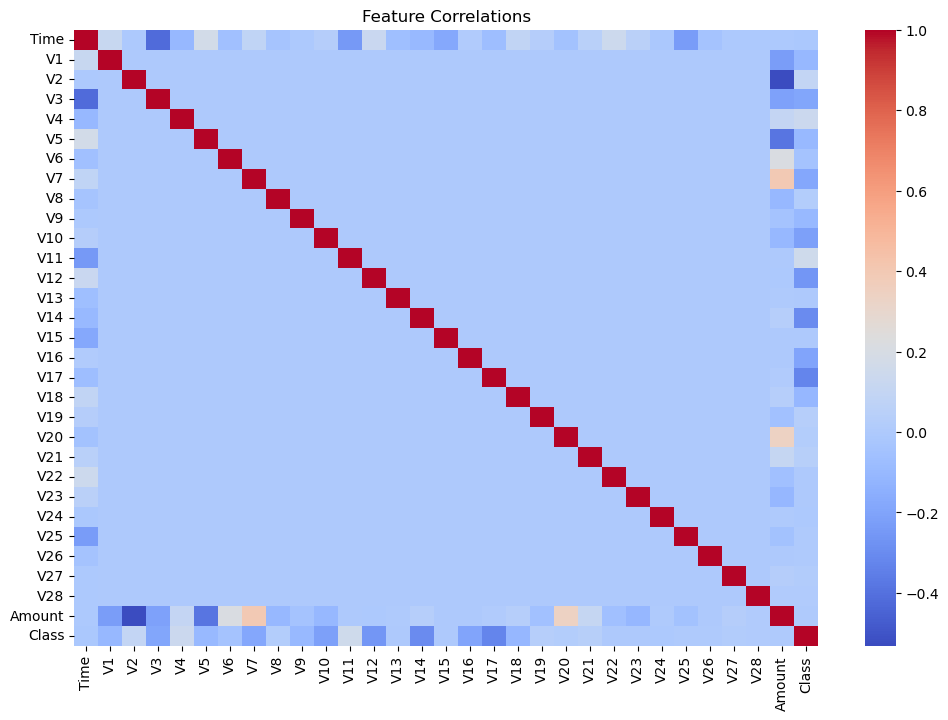

In [16]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlations")
plt.show()

Data Cleaning

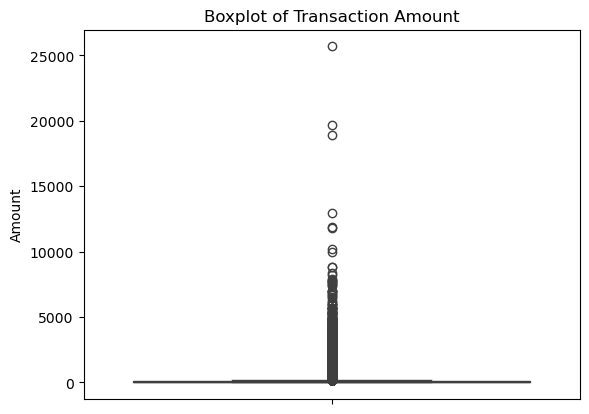

In [18]:
# Check for outliers in 'Amount'
sns.boxplot(df['Amount'])
plt.title("Boxplot of Transaction Amount")
plt.show()

# Log transformation for skewed features (if needed)
df['Amount_log'] = np.log1p(df['Amount'])

Data Preprocessing

In [20]:
# missing values
print(df.isnull().sum())

Time          0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
Amount_log    0
dtype: int64


Feature Engineering

In [22]:
from sklearn.preprocessing import StandardScaler

# Feature scaling for 'Amount'
scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df[['Amount']])

# Convert 'Time' into hours
df['Time_hours'] = df['Time'] / 3600


Handle Imbalanced Data

In [24]:
from imblearn.over_sampling import SMOTE

# Separate features and target
X = df.drop(columns=['Class', 'Time', 'Amount'], axis=1)
y = df['Class']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class distribution
print(pd.Series(y_resampled).value_counts())


Class
0    284315
1    284315
Name: count, dtype: int64


Split Data into Train/Test Sets

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)


Feature scaling

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Model Selection

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)

    # Predict on test data
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Evaluate metrics
    accuracy = model.score(X_test, y_test)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    report = classification_report(y_test, y_pred)

    # Store results
    results[name] = {
        "Model": model,
        "Accuracy": accuracy,
        "ROC_AUC": roc_auc,
        "Classification Report": report
    }
    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    print(report)
    print("-" * 50)


Training Logistic Regression...
Logistic Regression Results:
Accuracy: 0.9483
ROC-AUC: 0.9897
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     56863
           1       0.97      0.92      0.95     56863

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

--------------------------------------------------
Training Decision Tree...
Decision Tree Results:
Accuracy: 0.9982
ROC-AUC: 0.9982
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

--------------------------------------------------
Training Random Forest...
Random Forest Results:
Accuracy: 0.9999
RO

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [12:37:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Results:
Accuracy: 0.9997
ROC-AUC: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

--------------------------------------------------


In [31]:
# Sample of the data for faster training 
sample_frac = 0.5  # Use 50% of the data
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=sample_frac, random_state=42, stratify=y)

# Train-test split on the sampled data
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=sample_frac, random_state=42, stratify=y)

In [32]:
# Train-test split on the sampled data
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42, stratify=y_sample)

Hyperparameter Tuning

In [34]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier 


# Define a reduced parameter grid
param_dist = {
    'n_estimators': [50, 100],  # Reduced range of trees
    'max_depth': [10, 20],      # Focus on two depths
    'min_samples_split': [5, 10],  # Higher split values for speed
    'min_samples_leaf': [1, 2], 
    'max_features': ['sqrt']
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,  # Reduce the number of combinations
    cv=3,       # Fewer cross-validation folds
    scoring='roc_auc',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best ROC-AUC Score during CV:", random_search.best_score_)

# Evaluate on test set
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]

# Classification report
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score on Test Set: {roc_auc:.4f}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}
Best ROC-AUC Score during CV: 0.9707313491887625

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     42647
           1       0.87      0.74      0.80        74

    accuracy                           1.00     42721
   macro avg       0.94      0.87      0.90     42721
weighted avg       1.00      1.00      1.00     42721

ROC-AUC Score on Test Set: 0.9872


In [35]:
# Get the best model from RandomizedSearchCV
best_rf = random_search.best_estimator_

# Test set predictions
y_test_pred = best_rf.predict(X_test)
y_test_proba = best_rf.predict_proba(X_test)[:, 1]

# Evaluate the model
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

print("Test Set Performance:")
print("ROC-AUC Score:", roc_auc_score(y_test, y_test_proba))
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Test Set Performance:
ROC-AUC Score: 0.9871683886385976
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     42647
           1       0.87      0.74      0.80        74

    accuracy                           1.00     42721
   macro avg       0.94      0.87      0.90     42721
weighted avg       1.00      1.00      1.00     42721

Confusion Matrix:
 [[42639     8]
 [   19    55]]


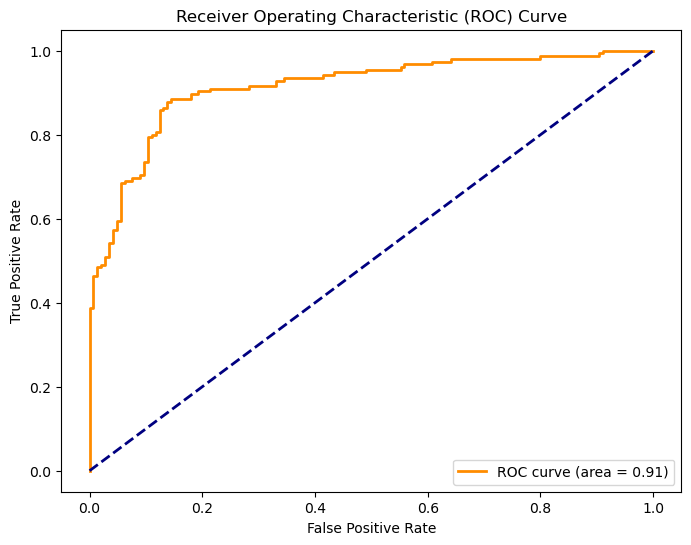

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Example: Generate synthetic binary classification data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_classes=2, random_state=42)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get the predicted probabilities for the test set
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [37]:
# Model Deployment

In [38]:
import joblib

# Save model and scaler
joblib.dump(best_rf, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

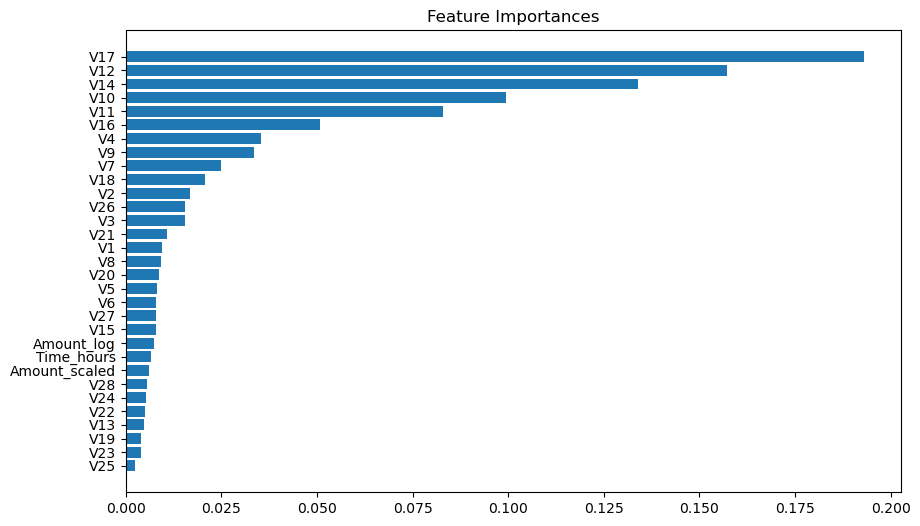

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

# Feature importance
feature_importances = pd.DataFrame({
    'Feature': df.drop(columns=['Class', 'Time', 'Amount']).columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()




In [40]:
# Loading the model

In [41]:
# Load the saved model 
model = joblib.load('random_forest_model.pkl')

In [42]:
#Creating requirements.txt

In [43]:
%%writefile requirements.txt
pandas
numpy
matplotlib
seaborn
scikit-learn
imblearn
joblib

Overwriting requirements.txt


In [44]:
# Creating train.py file

In [45]:
%%writefile train.py
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv('path_to_your_data.csv')  # Replace with your actual data path

# Preprocessing
X = df.drop(columns=['Class', 'Time', 'Amount'], axis=1)  # Adjust according to your dataset
y = df['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Save model and scaler
joblib.dump(model, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Model training completed and saved.")


Overwriting train.py


In [46]:
# Testing the model

In [53]:
import joblib
import pandas as pd
import numpy as np

# Load the trained model and scaler
model = joblib.load('random_forest_model.pkl')  # Replace with the actual path if different
scaler = joblib.load('scaler.pkl')  # Replace with the actual path if different

# Sample transaction data for testing (ensure you match the format used during training)
sample_transaction = pd.DataFrame({
    'V1': [-1.359807], 
    'V2': [-0.072781], 
    'V3': [2.536347], 
    'V4': [1.378155], 
    'V5': [-0.338321], 
    'V6': [0.462388], 
    'V7': [0.239599], 
    'V8': [0.098698], 
    'V9': [0.363787], 
    'V10': [0.090794], 
    'V11': [-0.551600], 
    'V12': [-0.617801], 
    'V13': [-0.991390], 
    'V14': [-0.311169], 
    'V15': [1.468177], 
    'V16': [-0.470401], 
    'V17': [0.207971], 
    'V18': [0.025791], 
    'V19': [0.403993], 
    'V20': [0.251412], 
    'V21': [-0.018307], 
    'V22': [0.277838], 
    'V23': [-0.110474], 
    'V24': [0.066928], 
    'V25': [0.128539], 
    'V26': [-0.189115], 
    'V27': [0.133558], 
    'V28': [-0.021053],
    'Time': [0.0],  # Assuming 'Time' is also available in the new sample
    'Amount': [149.62]  # Assuming 'Amount' is available
})

# Feature Engineering (apply the same transformations as during training)
sample_transaction['Amount_log'] = np.log(sample_transaction['Amount'] + 1)
sample_transaction['Amount_scaled'] = sample_transaction['Amount'] / sample_transaction['Amount'].max()
sample_transaction['Time_hours'] = sample_transaction['Time'] / 60  # Assuming time is in minutes, adjust if necessary

# Define the list of feature columns used during training
# Replace this with the actual feature columns used for training
feature_columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 
                   'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 
                   'V26', 'V27', 'V28', 'Amount_log', 'Amount_scaled', 'Time_hours']  # Add all feature names used during training

# Drop 'Time' and 'Amount' (if still present) before scaling
sample_transaction = sample_transaction.drop(columns=['Time', 'Amount'])

# Ensure the sample data has the same columns in the correct order as used for training
sample_transaction = sample_transaction[feature_columns]

# Apply scaling to the sample transaction
scaled_transaction = scaler.transform(sample_transaction)

# Make prediction
prediction = model.predict(scaled_transaction)

# Output result: 0 for non-fraud, 1 for fraud
if prediction == 1:
    print("The transaction is fraudulent.")
else:
    print("The transaction is not fraudulent.")


The transaction is not fraudulent.


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
